In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import IBMQ
import qiskit
import random
import pandas as pd
import numpy as np 
from qiskit.providers.ibmq import IBMQJob
from qiskit.providers.ibmq.job import job_monitor







In [2]:
IBMQ.save_account('e16aff0cd0c88a64f3123ca8f2417390e7c73433dbc8b7d872ff853bd6045d642d2230ed0b26ee080c6947f2c924fa031339b76ecd79c0b96eb9b6c08184230d')

configrc.store_credentials:WARNING:2020-11-01 10:54:04,716: Credentials already present. Set overwrite=True to overwrite.


In [3]:
IBMQ.load_account()
IBMQ.providers()
provider = IBMQ.get_provider()
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [4]:
api = 'e16aff0cd0c88a64f3123ca8f2417390e7c73433dbc8b7d872ff853bd6045d642d2230ed0b26ee080c6947f2c924fa031339b76ecd79c0b96eb9b6c08184230d'

In [5]:
import numpy as np


def Pauli(j):
    if j == 0:
        return np.array([[1, 0], [0, 1]])
    elif j == 1:
        return np.array([[0, 1], [1, 0]])
    elif j == 2:
        return np.array([[0, -1j], [1j, 0]])
    elif j == 3:
        return np.array([[1, 0], [0, -1]])




In [6]:
def trace(A):
    tr = 0
    for i in range(len(A)):
        tr+= A[i][i] 
    return(tr)



In [7]:
def normTr(d, A):
    ev = np.linalg.eigvalsh(A)
    Ntr = 0
    for j in range(0, d):
        Ntr += abs(ev[j]) #calculate the sum of all absolute values 
    return Ntr

In [8]:
z = np.array([1,0])
o = np.array([0,1])

lst = [z,o]

def function(A): #function refers to reconstruction of density operator between two qubits
    M = np.zeros((4,4))
    dd = 0
    for i in lst:
        for j in lst:
            for i1 in lst:
                for j1 in lst:
                    M = M + A[dd] * np.kron(np.outer(i,i1),np.outer(j1,j))
                    dd = dd + 1
    return(M)               
                

In [9]:
def negativity(d, rhoTp):
    En = 0.5*(normTr(d, rhoTp) - 1.0)
    return En





In [10]:
#maximizing a  bell state:
#This cell makes measurements in x,y,and z bases 



#n is number of qubits
n = 2
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
qc = []

for i in range(3**n):
    qc.append(QuantumCircuit(q, c))
    qc[i].id(0)
    qc[i].id(1)
    qc[i].barrier(0,1)
    qc[i].h(0)
    qc[i].barrier(0,1)
    qc[i].id(0)
    qc[i].id(1)
    qc[i].barrier(0,1)
    qc[i].cx(0,1)
    qc[i].barrier(0,1)
    qc[i].id(0)
    qc[i].id(1)
    qc[i].barrier(0,1)
    
    


count = 0 #count refers to the total number of circuits.
for i in range(3):
    for j in range(3):
        if i == 0: 
            qc[count].h(0)
        elif i == 1:
            qc[count].s(0).inverse()
            qc[count].h(0)
        if j == 0:
            qc[count].h(1)
        elif j == 1:
            qc[count].s(1).inverse()
            qc[count].h(1)
        count += 1
        
for i in range(3**n):
    qc[i].measure(q,c)

  



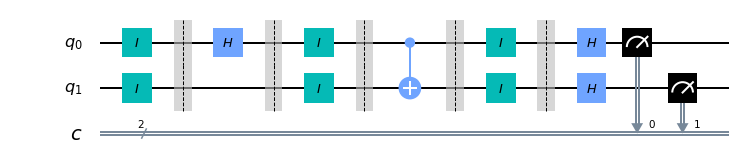

In [11]:
qc[0].draw(output = 'mpl')

#Automation planning:
1) Place id_gates in 5 positions of the circuit
2) write a code that does this in a single run. 


In [12]:
backend = provider.get_backend('ibmq_valencia')
from qiskit.providers.ibmq.job import job_monitor
from qiskit.visualization import plot_histogram

job_exp = qiskit.execute(qc,backend=backend, shots = 8132)



In [13]:
job_monitor(job_exp)

Job Status: job has successfully run


In [14]:
output = job_exp.result().get_counts()
output

[{'00': 3679, '11': 4028, '01': 250, '10': 175},
 {'00': 2099, '11': 2150, '01': 2169, '10': 1714},
 {'00': 2051, '11': 1946, '01': 2282, '10': 1853},
 {'00': 2118, '11': 2090, '01': 1833, '10': 2091},
 {'00': 347, '11': 94, '01': 3888, '10': 3803},
 {'00': 2118, '11': 1811, '01': 2112, '10': 2091},
 {'00': 2122, '11': 1998, '01': 1902, '10': 2110},
 {'00': 2045, '11': 1853, '01': 2149, '10': 2085},
 {'00': 4049, '11': 3700, '01': 227, '10': 156}]

In [15]:
#sorts the output based on tuples

def sort_output(data):
    sorted_output = []
    for i in range(len(output)):
        sorted_output.append(sorted(output[i].items()))
    return(sorted_output)




In [18]:
sort_output(output)

[[('00', 3679), ('01', 250), ('10', 175), ('11', 4028)],
 [('00', 2099), ('01', 2169), ('10', 1714), ('11', 2150)],
 [('00', 2051), ('01', 2282), ('10', 1853), ('11', 1946)],
 [('00', 2118), ('01', 1833), ('10', 2091), ('11', 2090)],
 [('00', 347), ('01', 3888), ('10', 3803), ('11', 94)],
 [('00', 2118), ('01', 2112), ('10', 2091), ('11', 1811)],
 [('00', 2122), ('01', 1902), ('10', 2110), ('11', 1998)],
 [('00', 2045), ('01', 2149), ('10', 2085), ('11', 1853)],
 [('00', 4049), ('01', 227), ('10', 156), ('11', 3700)]]

In [21]:
#takes the probabilities from the sorted_output and gives an array in sorted order.
def probability(sorted_output):
    ns = 8132
    values = []
    for i in range(len(sorted_output)):
        for j in range(4):
            values.append(sorted_output[i][j][1]/ns)
    p = np.array(values)
    p
    return(p)
    

In [37]:
p = probability(sort_output(output))
p

array([0.45241023, 0.03074274, 0.02151992, 0.4953271 , 0.25811608,
       0.26672405, 0.21077226, 0.2643876 , 0.25221348, 0.28061977,
       0.22786522, 0.23930152, 0.26045253, 0.2254058 , 0.25713232,
       0.25700935, 0.04267093, 0.47811117, 0.46765863, 0.01155927,
       0.26045253, 0.25971471, 0.25713232, 0.22270044, 0.26094442,
       0.2338908 , 0.25946877, 0.24569602, 0.25147565, 0.26426463,
       0.25639449, 0.22786522, 0.49790949, 0.02791441, 0.01918347,
       0.45499262])

In [39]:
#density operator reconstruction begins here. 
#Outputs probability coefficient using probability from IBM Q as input

def prob_coeff(p):
    d1 = np.eye(4)
    ab = [1, -1]
    A = []
    for i in range(1,4):
        for j in range(1,4):
            for a in ab :
                for b in ab :
                    B = []
                    for al in range(4):
                        for be in range(4):
                            mat = (d1[al][0] + a* d1[al][i]) * (d1[be][0] + b* d1[be][j])/4
                            #mat = (int(d0[al]) + a* int(d1[i][al])) * (int(d0[be]) + b*int(d1[j][be]))/4 
                            B.append(mat)
                    if (i == 1 and a == 1 and j == 1 and b == -1):
                        print(B)
                    A.append(B) #We append our matrix here because we need 16 different elements of c_s so that we don't need to reshape
    M = np.array(A, dtype = float)
    M_inv = np.linalg.pinv(M)
    C = np.matmul(M_inv, p)
    return(C)


In [40]:
prob_coeff(p)

[0.25, -0.25, 0.0, 0.0, 0.25, -0.25, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0]


array([ 1.        ,  0.00795212, -0.00860797,  0.00983768,  0.02721758,
        0.89547467,  0.04500738, -0.01697   ,  0.01787178,  0.03492376,
       -0.8915396 , -0.03369405,  0.02426627,  0.01328087, -0.04131825,
        0.90580423])

In [46]:
Coeff = prob_coeff(p)

[0.25, -0.25, 0.0, 0.0, 0.25, -0.25, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0]


#This is the rho equation which takes the prob coefficients (C) as its input
def rho_eq(C):
    B = []
    d = 0
    for al in range(4):
        for be in range(4):
            rho_q2 = C[d] * np.kron(Pauli(al),Pauli(be))/4
            d = d + 1
            B.append(rho_q2)
    
    
    return(B)

rho = np.zeros((4,4))
for i in range(len(B)):
    rho = rho + B[i]
rho

#We combine these two parts to create the function below. 




In [48]:
#This is the rho equation which takes the prob coefficients (C) as its input and returns the reconstructed density operator
def rho_eq(C):
    B = []
    d = 0
    rho = np.zeros((4,4))
    for al in range(4):
        for be in range(4):
            rho_q2 = C[d] * np.kron(Pauli(al),Pauli(be))/4
            d = d + 1
            B.append(rho_q2)
        
    for i in range(len(B)):
        rho = rho + B[i]
    return(rho)







In [72]:
rho = rho_eq(Coeff)
rho

array([[ 0.48497705+0.j        ,  0.00530825+0.01248155j,
         0.0025619 +0.00395557j,  0.44675357-0.01998278j],
       [ 0.00530825-0.01248155j,  0.02715609+0.j        ,
         0.00098377+0.00252091j,  0.01104689-0.01289146j],
       [ 0.0025619 -0.00395557j,  0.00098377-0.00252091j,
         0.01994179+0.j        , -0.00133219-0.00817757j],
       [ 0.44675357+0.01998278j,  0.01104689+0.01289146j,
        -0.00133219+0.00817757j,  0.46792507+0.j        ]])

In [55]:
np.linalg.eigvalsh(rho)  ## one of the eigenvalues is negative but clos

array([0.01782375, 0.02389552, 0.03396123, 0.92431951])

In [66]:
#takes the reconstructed density operator as its input and changes the list with negative eigenvalues to positive.
def pos_eigval_creater(rho):
    a = 0
    eigval = np.linalg.eigvalsh(rho)
    meu = sorted(eigval, reverse = True)
    lmd = np.zeros(len(meu))
    count = 0
    for i in reversed(range(len(meu))) :
        if (meu[i].real + a/(i+1)) < 0:
            lmd[i] = 0
            a += lmd[i] + meu[i]
            lmd[i-1] = meu[i-1].real + a
            count = count + 1

        else:
            lmd[i] = meu[i].real + a/(count+1)
    return(lmd)
        

In [67]:
pos_eigval_creater(rho)

array([0.92431951, 0.03396123, 0.02389552, 0.01782375])

In [87]:
z = np.array([1,0])
o = np.array([0,1])

lst = [z,o]

def partial_transpose(matrix, q):#This function computes the partial transpose of a matrix. 
    M = np.zeros((4,4))
    dd = 0
    for i in lst:
        for j in lst:
            for i1 in lst:
                for j1 in lst:
                    if q == 0:
                        M = M + matrix[dd] * np.kron(np.outer(i1,i),np.outer(j,j1))
                    elif q == 1:
                        M = M + matrix[dd] * np.kron(np.outer(i,i1),np.outer(j1,j))
                    dd = dd + 1
    return(M)               
                

In [93]:
def matrix_to_list(rho):
    rho_list = []
    for i in range(len(rho)):
        for j in range(len(rho[0])):
            rho_list.append(rho[i][j])
    return(rho_list)


In [94]:
rhoTp = partial_transpose(rho_list, 1)
rhoTp



array([[ 0.48497705+0.j        ,  0.00530825-0.01248155j,
         0.0025619 +0.00395557j,  0.00098377+0.00252091j],
       [ 0.00530825+0.01248155j,  0.02715609+0.j        ,
         0.44675357-0.01998278j,  0.01104689-0.01289146j],
       [ 0.0025619 -0.00395557j,  0.44675357+0.01998278j,
         0.01994179+0.j        , -0.00133219+0.00817757j],
       [ 0.00098377-0.00252091j,  0.01104689+0.01289146j,
        -0.00133219-0.00817757j,  0.46792507+0.j        ]])

In [95]:
negativity(4, rhoTp)

0.42415157720449836